In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Y(x):
    return 2.0*(x**3 -x**2 +0.05*x)

# A simple Boundary-Value Problem

Consider the Boundary-Value Problem (BVP)

$$\frac{d^{2}y}{dx^{2}}=12x -4,\quad y(0)=0,\quad y(1) = 0.1$$

Solve the BVP ODE with the shooting method.

Fisrt, we need to rewrite the second-order ODE as two first-order ODEs:

$$\frac{dy}{dx}=u(x)$$

$$\frac{du}{dx} = 12x - 4$$

This is really simple BVP and therefore it will require only very few shooting iterations for reasonable guesses. Hence use the initial values $u(0) = z_{o} = -1100000.0 $ and  $u(0) = z_{1} = -10000000.0$ as initial guesses so that you get to do at least two iterations of shooting.

Solve the problema by implementing an RK2(or higher) integrator. Demonstrate convergence. Make a plot of your solution for $y(x)$ and compare it with the true solution is 

$$y(x) = 2x^{3}-2x^{2}+0.1x$$

Consider a boundary problem of the form 

$$\frac{d^{2}y}{dx^{2}} = f\left(x,y,\frac{dy}{dx}\right),\qquad a\leq x \leq b$$

$$y(a) = \alpha, \qquad y(b) = \beta$$

One natural way to approach this problem is to study the initial value problem (IVP) associated with this differential equation:

$$\frac{d^{2}y}{dx^{2}} = f\left(x,y,\frac{dy}{dx}\right),\qquad a\leq x \leq b$$

$$y(a) = \alpha, \qquad \frac{dy}{dx}(a) = t$$

The goal is to determine an appropiate value $t$ for the initial slope, so that solution of the IVP is also a solution of the boundary value problem. 




The goal is to determine an appropiate value $t$ for the initial slope, so that the solution of the IVP is also a solution of the boundary value problem. Let $y(x,y)$ be the solution of the before differential equation. We wish to find a value of $t$ so that $y(b,t)-\beta=0$. Applying Newton's method to the function $h(t) = y(b,t)-\beta$, we obtain the iterarive method

$$t_{n+1} = t_{n}-\frac{h(t_{n})}{h'(t_{n})}$$

$$t_{n+1} = t_{n}-\frac{y(b,t_{n})-\beta}{\frac{d}{dt}y(b,t)_{t_{n}}}$$

We recall that Newton's method requires a good initial guess $t_{o}$; a plausible initial guess would be the average rate of change of the solution across the entire interval, so that $t_{o} = (\beta-\alpha)/(b-a)$.If this initial guess is not sufficient, the initial guess may be refined by looking at the solution $y(x,t_{o})$ of the inital value problem.

This method requires us to evaluate or aproximate function $\frac{d}{dt}y(b,t)_{t_{n}}$. This terms may be aproximated with a finite difference, giving us the iterative method 


$$t_{n+1} = t_{n}-\frac{(y(b,t_{n})-\beta)(t_{n}-t_{n-1})}{y(b,t_{n})-y(b,t_{n-1})},\quad n = 1,2,\cdots$$

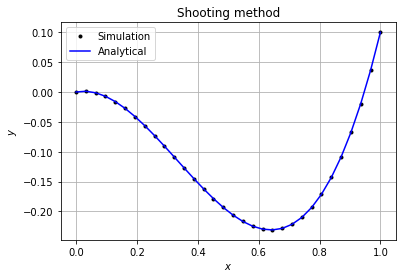

In [61]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt


def find_t(f,a,b,alpha,beta,t0,t1):
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 1e-8 :
        sol0 = odeint(f,np.array([alpha,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,t1]), [a,b],atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1):
    t = find_t(f,a,b,alpha,beta,t0,t1)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([y[1], 12*x-4])

X = np.linspace(0,1,32)
Ye = solveSecant(ode,X,0,1,0,0.1,-1100000,-100000)
plt.plot(X,Ye,'k.',linewidth=2,label = "Simulation")
plt.plot(x,Y(x),"b-",label = "Analytical")
plt.legend()
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Shooting method")
plt.show()

Solve the BVP ODE with the finite-difference method

$$\frac{d^{2}y}{dx^{2}}=12x -4,\quad y(0)=0,\quad y(1) = 0.1$$

consider a central diference in the derivative we have

$\left(\frac{d^{2}y}{dx^{2}}\right)_{i} = \frac{y_{i+1}(x_{i}-x_{i-1})-y_{i}(x_{i+1}-x_{i-1})+y_{i-1}(x_{i+1}-x_{i+1}))}{(x_{i+1})^{2}(x_{i}-x_{i-1})}$

So

$$\frac{y_{i+1}}{(x_{i+1}-x_{i-1})(x_{i+1}+x_{i})}+\frac{y_{i-1}}{(x_{i+1}-x_{i-1})(x_{i}-x_{i-1})}-\frac{y_{i}}{(x_{i+1}-x_{i})(x_{i}-x_{i-1})} = \frac{12x_{i}-4}{2}$$

we define

$$r_{1} = x_{i+1}-x_{i-1}$$
$$r_{2} = x_{i+1}-x_{i-1}$$
$$r_{3} = x_{i}-x_{i-1}$$

Now

$$y_{i} = r_{2}r_{3}\left(\frac{y_{i+1}}{r_{1}r_{2}}+\frac{y_{i-1}}{r_{1}r_{3}}-(6x_{i}-2)\right)$$

with the boundary conditions 

$$y_{o} = 0 \qquad y_{n} = 0.1$$


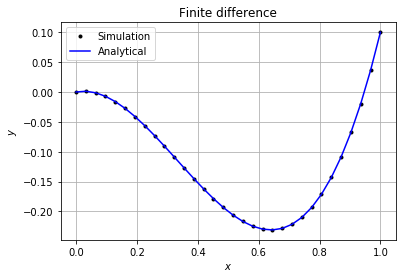

In [62]:
n = 32
b = 1.0 ; a = 0.0
dx = (b-a)/n
x = np.linspace(a,b,n)
y = np.zeros(n)
y[0] = 0.0 ; y[-1] = 0.1
E = 1.0
aux = 0
dif =1e-1
while(np.abs(dif) > 1e-10):
    aux = E
    for i in range(1,n-1):
        r1 = x[i+1]-x[i-1]
        r2 = x[i+1]-x[i]
        r3 = x[i]-x[i-1]
        y[i] = ((r2*r3)/(r1*r2))*y[i+1] + ((r2*r3)/(r1*r3))*y[i-1] - r2*r3*(6.0*x[i]-2.0)
    E = np.abs(np.mean((y[1:-1]-Y(x)[1:-1])/Y(x)[1:-1]))
    dif = E-aux

plt.plot(x,y,"k.",label = "Simulation")
plt.plot(x,Y(x),"b-",label = "Analytical")
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Finite difference")
plt.legend()


## Comparare the methods


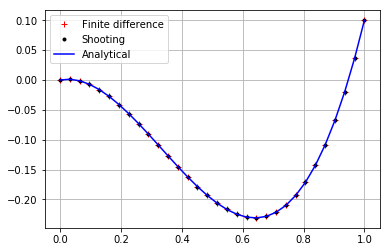

In [58]:
plt.plot(x,y,"r+",label = "Finite difference")
plt.plot(X,Ye,'k.',linewidth=2,label = "Shooting")
plt.plot(x,Y(x),"b-",label = "Analytical")
plt.legend()
plt.grid(True)